In [49]:
import cv2
import os
import pandas as pd
import mediapipe as mp
import numpy as np
from mediapipe.framework.formats import landmark_pb2

mp_face_mesh = mp.solutions.face_mesh

In [50]:
cols = []
for point in range(39):
    for num in ("x", "y", "z"):
        cols.append("p" + "%02d" % point + "_" + num)
cols = cols + ["label"]

# 1) Drowsy.csv

In [51]:
drowsy_path = ("../../../Datasets/Drowsy/")
drowsy_files = os.listdir(drowsy_path)
drowsy_coord = pd.DataFrame(columns=cols)
drowsy_coord

,p00_x,p00_y,p00_z,p01_x,p01_y,p01_z,p02_x,p02_y,p02_z,p03_x,...,p36_x,p36_y,p36_z,p37_x,p37_y,p37_z,p38_x,p38_y,p38_z,label


In [53]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(drowsy_files):
        image = cv2.imread(drowsy_path + file_name)

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(1)
            
            drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
6000
6100
6200
6300
6400
6500
6600
7000
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8400
8500
8600
8700
8900
9000
9100
9200
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200

In [54]:
drowsy_coord.to_csv('./csv/drowsy_39_Points_2.csv', index=False, encoding='utf-8-sig')

# 2) Non-Drowsy.csv

In [55]:
non_drowsy_path = ("../../../Datasets/Non-Drowsy/")
non_drowsy_files = os.listdir(non_drowsy_path)
non_drowsy_coord = pd.DataFrame(columns=cols)
non_drowsy_coord

,p00_x,p00_y,p00_z,p01_x,p01_y,p01_z,p02_x,p02_y,p02_z,p03_x,...,p36_x,p36_y,p36_z,p37_x,p37_y,p37_z,p38_x,p38_y,p38_z,label


In [56]:
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    for index, file_name in enumerate(non_drowsy_files):
        image = cv2.imread(non_drowsy_path + file_name)

        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                          
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp.append(0)
            
            non_drowsy_coord.loc[index] = temp
            if index % 100 == 0:
                print(index)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5900
6000
6100
6200
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8100
8300
8400
8500
8600
8700
8800
8900
9000
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
189

In [57]:
non_drowsy_coord.to_csv('./csv/non-drowsy_39_Points_2.csv', index=False, encoding='utf-8-sig')

# 3) 모델 학습

In [2]:
drowsy_coord = pd.read_csv('./drowsy_39_Points.csv')
non_drowsy_coord = pd.read_csv('./non-drowsy_39_Points.csv')

In [58]:
from sklearn.preprocessing import LabelEncoder

df = pd.concat([drowsy_coord, non_drowsy_coord])
df = df.sample(frac=1).reset_index(drop=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39691, 117), (9923, 117), (39691, 2), (9923, 2))

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(64,input_shape=(117,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto')

model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 64)                7552      
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 dense_54 (Dense)            (None, 128)               8320      
                                                                 
 dense_55 (Dense)            (None, 256)               33024     
                                                                 
 dense_56 (Dense)            (None, 2)                 514       
                                                                 
Total params: 53,570
Trainable params: 53,570
Non-trainable params: 0
_________________________________________________________________


In [106]:
from keras.callbacks import EarlyStopping 

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 100, mode = 'auto')
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, callbacks = [early_stopping])
model.save('./model/model02')

Epoch 1/1000
1241/1241 [==============================] - 4s 2ms/step - loss: 0.6304 - accuracy: 0.6222 - val_loss: 0.5406 - val_accuracy: 0.6710
Epoch 2/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.5299 - accuracy: 0.7223 - val_loss: 0.4645 - val_accuracy: 0.7789
Epoch 3/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.4748 - accuracy: 0.7644 - val_loss: 0.5555 - val_accuracy: 0.6964
Epoch 4/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.4278 - accuracy: 0.7924 - val_loss: 0.4380 - val_accuracy: 0.7855
Epoch 5/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8122 - val_loss: 0.3811 - val_accuracy: 0.8139
Epoch 6/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.3612 - accuracy: 0.8337 - val_loss: 0.3598 - val_accuracy: 0.8455
Epoch 7/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.3410 - accuracy: 0.8475 - val_loss: 0.3331 -

Epoch 57/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2144 - accuracy: 0.9198 - val_loss: 0.1999 - val_accuracy: 0.9226
Epoch 58/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2175 - accuracy: 0.9212 - val_loss: 0.1691 - val_accuracy: 0.9395
Epoch 59/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2178 - accuracy: 0.9201 - val_loss: 0.4540 - val_accuracy: 0.8722
Epoch 60/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2140 - accuracy: 0.9221 - val_loss: 0.3421 - val_accuracy: 0.8499
Epoch 61/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2147 - accuracy: 0.9210 - val_loss: 0.5062 - val_accuracy: 0.8572
Epoch 62/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2133 - accuracy: 0.9212 - val_loss: 0.2341 - val_accuracy: 0.9117
Epoch 63/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9190 - val_loss: 0

1241/1241 [==============================] - 3s 2ms/step - loss: 0.1903 - accuracy: 0.9313 - val_loss: 0.2241 - val_accuracy: 0.9232
Epoch 113/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1877 - accuracy: 0.9311 - val_loss: 0.2278 - val_accuracy: 0.9303
Epoch 114/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1945 - accuracy: 0.9315 - val_loss: 0.1540 - val_accuracy: 0.9432
Epoch 115/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1903 - accuracy: 0.9318 - val_loss: 0.2560 - val_accuracy: 0.8988
Epoch 116/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1823 - accuracy: 0.9349 - val_loss: 0.3490 - val_accuracy: 0.8746
Epoch 117/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1861 - accuracy: 0.9323 - val_loss: 0.8561 - val_accuracy: 0.7635
Epoch 118/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1878 - accuracy: 0.9339 - val_loss: 0.1728 - 

1241/1241 [==============================] - 3s 2ms/step - loss: 0.1830 - accuracy: 0.9364 - val_loss: 0.1452 - val_accuracy: 0.9455
Epoch 168/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1767 - accuracy: 0.9364 - val_loss: 0.6155 - val_accuracy: 0.8079
Epoch 169/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1875 - accuracy: 0.9372 - val_loss: 0.1513 - val_accuracy: 0.9428
Epoch 170/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1796 - accuracy: 0.9383 - val_loss: 0.1752 - val_accuracy: 0.9384
Epoch 171/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1816 - accuracy: 0.9382 - val_loss: 0.1693 - val_accuracy: 0.9393
Epoch 172/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1825 - accuracy: 0.9377 - val_loss: 0.1603 - val_accuracy: 0.9383
Epoch 173/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1734 - accuracy: 0.9385 - val_loss: 0.1415 - 

1241/1241 [==============================] - 3s 3ms/step - loss: 0.1833 - accuracy: 0.9400 - val_loss: 0.3122 - val_accuracy: 0.9161
Epoch 223/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1798 - accuracy: 0.9405 - val_loss: 0.1760 - val_accuracy: 0.9513
Epoch 224/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1812 - accuracy: 0.9391 - val_loss: 0.1491 - val_accuracy: 0.9475
Epoch 225/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1847 - accuracy: 0.9412 - val_loss: 0.1972 - val_accuracy: 0.9394
Epoch 226/1000
1241/1241 [==============================] - 3s 2ms/step - loss: 0.1847 - accuracy: 0.9402 - val_loss: 0.2460 - val_accuracy: 0.9310
Epoch 227/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1790 - accuracy: 0.9400 - val_loss: 0.1773 - val_accuracy: 0.9469
Epoch 228/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1770 - accuracy: 0.9401 - val_loss: 0.1610 - 

1241/1241 [==============================] - 3s 2ms/step - loss: 0.1895 - accuracy: 0.9409 - val_loss: 0.2019 - val_accuracy: 0.9469
Epoch 278/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1900 - accuracy: 0.9401 - val_loss: 0.1762 - val_accuracy: 0.9415
Epoch 279/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1888 - accuracy: 0.9410 - val_loss: 0.3170 - val_accuracy: 0.9298
Epoch 280/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1977 - accuracy: 0.9387 - val_loss: 0.2473 - val_accuracy: 0.9239
Epoch 281/1000
1241/1241 [==============================] - 3s 3ms/step - loss: 0.1931 - accuracy: 0.9417 - val_loss: 0.2096 - val_accuracy: 0.9486
Epoch 282/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1927 - accuracy: 0.9387 - val_loss: 0.1623 - val_accuracy: 0.9476
Epoch 283/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1889 - accuracy: 0.9394 - val_loss: 0.1829 - 

1241/1241 [==============================] - 4s 3ms/step - loss: 0.1934 - accuracy: 0.9384 - val_loss: 0.7080 - val_accuracy: 0.9206
Epoch 333/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2110 - accuracy: 0.9383 - val_loss: 0.1530 - val_accuracy: 0.9521
Epoch 334/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1932 - accuracy: 0.9381 - val_loss: 0.2659 - val_accuracy: 0.9363
Epoch 335/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1949 - accuracy: 0.9381 - val_loss: 0.3249 - val_accuracy: 0.9097
Epoch 336/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2043 - accuracy: 0.9386 - val_loss: 0.1279 - val_accuracy: 0.9522
Epoch 337/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1875 - accuracy: 0.9398 - val_loss: 0.2003 - val_accuracy: 0.9144
Epoch 338/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1977 - accuracy: 0.9392 - val_loss: 0.1504 - 

1241/1241 [==============================] - 4s 3ms/step - loss: 0.2014 - accuracy: 0.9371 - val_loss: 0.1812 - val_accuracy: 0.9465
Epoch 388/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.1999 - accuracy: 0.9386 - val_loss: 0.1526 - val_accuracy: 0.9470
Epoch 389/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2092 - accuracy: 0.9375 - val_loss: 0.2294 - val_accuracy: 0.9359
Epoch 390/1000
1241/1241 [==============================] - 4s 4ms/step - loss: 0.2086 - accuracy: 0.9364 - val_loss: 0.1831 - val_accuracy: 0.9425
Epoch 391/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2030 - accuracy: 0.9389 - val_loss: 0.1248 - val_accuracy: 0.9557
Epoch 392/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2133 - accuracy: 0.9351 - val_loss: 0.1849 - val_accuracy: 0.9368
Epoch 393/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2069 - accuracy: 0.9350 - val_loss: 0.2959 - 

1241/1241 [==============================] - 4s 3ms/step - loss: 0.2105 - accuracy: 0.9329 - val_loss: 0.1765 - val_accuracy: 0.9541
Epoch 443/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2084 - accuracy: 0.9341 - val_loss: 0.1644 - val_accuracy: 0.9609
Epoch 444/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2216 - accuracy: 0.9337 - val_loss: 0.2229 - val_accuracy: 0.9446
Epoch 445/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2441 - accuracy: 0.9327 - val_loss: 3.4896 - val_accuracy: 0.6835
Epoch 446/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2357 - accuracy: 0.9331 - val_loss: 0.2633 - val_accuracy: 0.9147
Epoch 447/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2072 - accuracy: 0.9324 - val_loss: 0.1881 - val_accuracy: 0.9461
Epoch 448/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2390 - accuracy: 0.9287 - val_loss: 0.4035 - 

1241/1241 [==============================] - 3s 3ms/step - loss: 0.2356 - accuracy: 0.9316 - val_loss: 0.6511 - val_accuracy: 0.9629
Epoch 498/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2639 - accuracy: 0.9303 - val_loss: 0.2001 - val_accuracy: 0.9450
Epoch 499/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2489 - accuracy: 0.9321 - val_loss: 0.1611 - val_accuracy: 0.9560
Epoch 500/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2496 - accuracy: 0.9320 - val_loss: 0.3170 - val_accuracy: 0.9431
Epoch 501/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2332 - accuracy: 0.9322 - val_loss: 0.2649 - val_accuracy: 0.8870
Epoch 502/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.9294 - val_loss: 0.2719 - val_accuracy: 0.9326
Epoch 503/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2340 - accuracy: 0.9313 - val_loss: 0.2405 - 

1241/1241 [==============================] - 4s 3ms/step - loss: 0.2588 - accuracy: 0.9286 - val_loss: 0.3182 - val_accuracy: 0.8835
Epoch 553/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2448 - accuracy: 0.9290 - val_loss: 0.1902 - val_accuracy: 0.9615
Epoch 554/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2536 - accuracy: 0.9292 - val_loss: 0.2016 - val_accuracy: 0.9504
Epoch 555/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2557 - accuracy: 0.9317 - val_loss: 1.3713 - val_accuracy: 0.8562
Epoch 556/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2613 - accuracy: 0.9294 - val_loss: 1.1054 - val_accuracy: 0.9197
Epoch 557/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2816 - accuracy: 0.9296 - val_loss: 0.3413 - val_accuracy: 0.8525
Epoch 558/1000
1241/1241 [==============================] - 4s 3ms/step - loss: 0.2706 - accuracy: 0.9284 - val_loss: 2.3647 - 

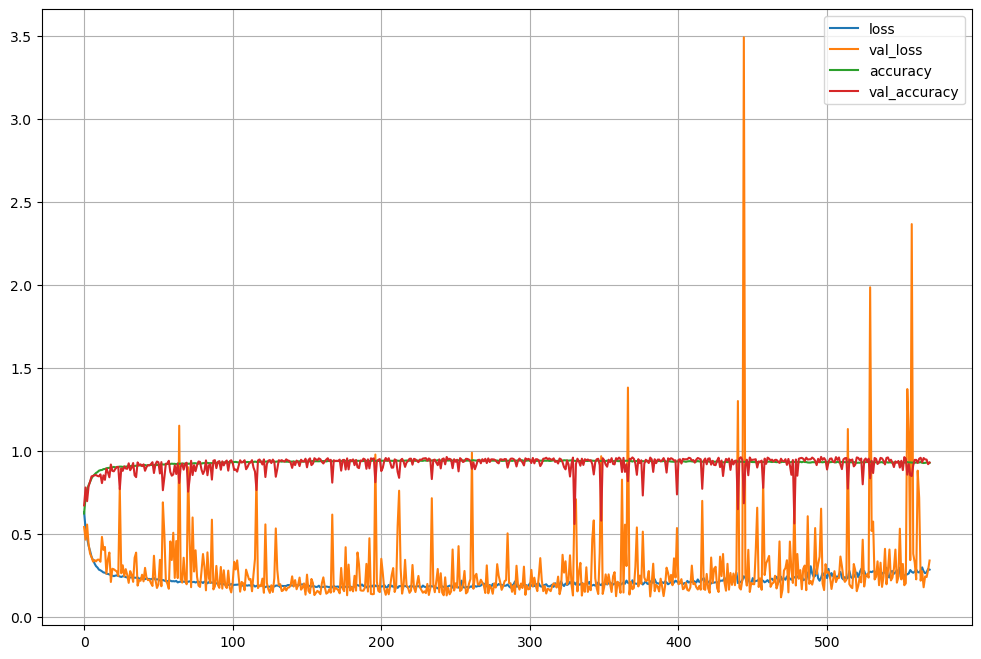

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [108]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

311/311 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.9290
Accuracy = 0.93


# 4) 성능 테스트

In [ ]:
cap = cv2.VideoCapture(0)
with mp_face_mesh.FaceMesh(max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    while cap.isOpened():
        success, image = cap.read()
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_face_landmarks:
            fls = results.multi_face_landmarks[0]
            point_list = [fls.landmark[46], fls.landmark[53], fls.landmark[52], fls.landmark[55], fls.landmark[65],
                
                          fls.landmark[276], fls.landmark[283], fls.landmark[282], fls.landmark[295], fls.landmark[285],
                          
                          fls.landmark[130], fls.landmark[160], fls.landmark[158], fls.landmark[133], fls.landmark[153], fls.landmark[144],
                          
                          fls.landmark[359], fls.landmark[387], fls.landmark[385], fls.landmark[362], fls.landmark[380], fls.landmark[373],
                          
                          fls.landmark[168], fls.landmark[6], fls.landmark[195], fls.landmark[4],
                          
                          fls.landmark[61],  fls.landmark[39], fls.landmark[0], fls.landmark[269], fls.landmark[291], fls.landmark[405], fls.landmark[17], fls.landmark[181],

                          fls.landmark[234], fls.landmark[132], fls.landmark[152], fls.landmark[288], fls.landmark[454]]
            
            temp = []
            for i, points in enumerate(point_list):
                temp.append(points.x)
                temp.append(points.y)
                temp.append(points.z)
            temp = np.array(temp).reshape(1, 117)
        
            classes = model.predict(temp)[0]
            cName = "Non-Drowsy"
            if(classes[0] < classes[1]):
                cName = "Drowsy"
            
            image = cv2.flip(image, 1)
            cv2.putText(image, cName, (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (98, 17, 0), 2, cv2.LINE_AA)
            
            cv2.imshow('MediaPipe Face Mesh', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
                
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step
